# Script 1 : Generate Figure 2A

### Organize tightly-coupled (TC) model assimilation rate

In [2]:
import glob

TC_ODE_A_dict=dict()
for fname in glob.glob("TC_ODEfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vc" in line:
            TC_ODE_A_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vc")[1])


TC_FBA_A_dict=dict()
for fname in glob.glob("TC_FBAfluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "CO2_tx" in line:
            TC_FBA_A_dict[int(fname.split("_")[3].split(".")[0])] = float(line.split(",")[2])


TC_A_dict=dict()
for k in TC_ODE_A_dict.keys():
    TC_A_dict[k] = TC_ODE_A_dict[k] - TC_FBA_A_dict[k]

### Organize e-photosynthesis (ODE) model assimilation rate

In [14]:
import glob

ODE_Vc_dict=dict()
ODE_Vo_dict=dict()
for fname in glob.glob("ODEonly_fluxes_Fig2A*"):
    fin = open(fname)
    for line in fin:
        if "vc" in line:
            ODE_Vc_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vc")[1])
        if "vo" in line:
            ODE_Vo_dict[int(fname.split("_")[3].split(".")[0])]=float(line.replace(" ","").split("vo")[1])


ODE_A_dict=dict()
for k in ODE_Vc_dict.keys():
    ODE_A_dict[k] = ODE_Vc_dict[k] - (0.5*ODE_Vo_dict[k])

### Data from litterature

Morgan et al data

In [3]:
Morgan = dict()
Morgan[50]=-0.48
Morgan[85]=4.3
Morgan[148]=14.1
Morgan[304]=26
Morgan[482]=30.4
Morgan[670]=31.6
Morgan[863]=30.7
Morgan[1051]=31.5
Morgan[77]=3
Morgan[144]=9.4
Morgan[206]=15.7
Morgan[273]=21.4
Morgan[427]=32.1
Morgan[605]=36.3
Morgan[787]=38.6
Morgan[968]=40.3


Sun et al data 2014

In [7]:
Sun = dict()
Sun[267]=22.4
Sun[197]=17.3
Sun[137]=10.7
Sun[76]=3.95
Sun[46.2]=0.562
Sun[272]=22.7
Sun[411]=27.9
Sun[583]=30.5
Sun[726]=30.7
Sun[852]=33.1
Sun[1.04E+03]=32.4
Sun[229]=22.6
Sun[179]=16.7
Sun[126]=10.5
Sun[72]=3.99
Sun[44.4]=-0.214
Sun[250]=23.3
Sun[380]=30.9
Sun[588]=33.1
Sun[764]=32.3
Sun[904]=34.7
Sun[1.16E+03]=35.2
Sun[275]=20.2
Sun[197]=15
Sun[137]=9.28
Sun[79.7]=3.1
Sun[50.5]=-0.361
Sun[273]=21.2
Sun[424]=25.7
Sun[608]=27.7
Sun[709]=29
Sun[831]=31.6
Sun[1.07E+03]=32.1



Zhange et al 2011

In [11]:
Zhang = dict()
Zhang[0]=-6.7
Zhang[100]=-0.76
Zhang[200]=3.1
Zhang[300]=6.2
Zhang[500]=11.7
Zhang[800]=16.4
Zhang[1200]=20.5
Zhang[1500]=21.8
Zhang[1800]=23.2
Zhang[2000]=23.5




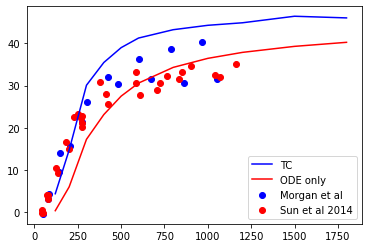

In [16]:
import matplotlib.pyplot as plt
Clist1 = list()
Alist1 = list()
for k in sorted(TC_A_dict.keys()):
    Clist1.append(k)
    Alist1.append(TC_A_dict[k])
plt.plot(Clist1,Alist1,label="TC",color="blue")

Clist2 = list()
Alist2 = list()
for k in sorted(ODE_A_dict.keys()):
    Clist2.append(k)
    Alist2.append(ODE_A_dict[k])
plt.plot(Clist2,Alist2,label="ODE only",color="red")

ClistD1 = list()
AlistD1 = list()
for k in sorted(Morgan.keys()):
    ClistD1.append(k)
    AlistD1.append(Morgan[k])
plt.scatter(ClistD1,AlistD1,label="Morgan et al",color="blue")

ClistD2 = list()
AlistD2 = list()
for k in sorted(Sun.keys()):
    ClistD2.append(k)
    AlistD2.append(Sun[k])
plt.scatter(ClistD2,AlistD2,label="Sun et al 2014",color="red")


plt.legend()
plt.show()

In [23]:
sorted(TC_A_dict.keys())

[120, 200, 300, 400, 500, 600, 800, 1000, 1200, 1500, 1800]